### Homework 5 (Due July 17)
Data on weekly-averaged COVID-19 cases and weekly-averaged COVID-19-related deaths in Louisiana
are provided for each of the first three “waves”. For each wave, perform a lagged cross-correlation
analysis and find the lag of peak correlation. At the lag of peak correlation perform a linear regression
to determine the slope (=deaths/case) and its standard error.
• What is the lag of peak correlation in each wave?
• What are the value and standard error of the deaths/case slope in each wave?
• Comment on any differences in these values for different waves.

In [6]:
import pandas as pd
from scipy.signal import correlate, correlation_lags
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r'/Users/sushovanadhikari/Desktop/start_over_workspace/hw5/second_wave.csv')
print(df)

           date  wkly avg cases  wkly avg deaths
0      6/8/2020      387.000000        20.142857
1      6/9/2020      387.285714        17.142857
2     6/10/2020      391.714286        13.714286
3     6/11/2020      393.571429        14.571429
4     6/12/2020      407.285714        11.714286
..          ...             ...              ...
144  10/30/2020      485.714286        13.000000
145  10/31/2020      485.714286        13.000000
146   11/1/2020      499.857143        11.571429
147   11/2/2020      506.714286        10.285714
148   11/3/2020      539.714286        10.142857

[149 rows x 3 columns]


In [8]:
weekly_avg_cases = df['wkly avg cases']
weekly_avg_deaths = df['wkly avg deaths']
correlation = correlate(weekly_avg_cases, weekly_avg_deaths, mode='full')
lags = correlation_lags(weekly_avg_cases.size, weekly_avg_deaths.size, mode='full')
lag = lags[np.argmax(correlation)]
print(lag)

-15


In [9]:
x,y = None,None
if lag > 0:
    x = weekly_avg_cases[:-lag]
    y = weekly_avg_deaths[lag:]
else:
    x = weekly_avg_cases[-lag:]
    y = weekly_avg_deaths[:lag]

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'slope: {slope}, standard error: {std_err}')

slope: -0.0030692725814848807, standard error: 0.0013334984451027164


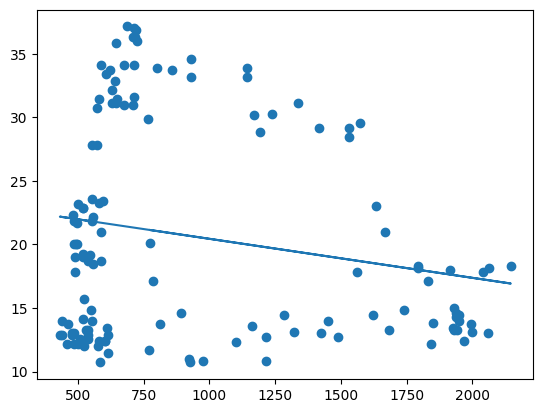

In [10]:
plt.scatter(x,y)
plt.plot(x, slope*x + intercept)
plt.show()